In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from datetime import datetime

In [19]:
data = pd.read_csv("../Data/dataset.csv")

In [20]:
data.head()
data.info()
for col in data.columns:
    features=col
    print(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29239 entries, 0 to 29238
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           29239 non-null  object 
 1   artists            29239 non-null  object 
 2   album_name         29239 non-null  object 
 3   track_name         29239 non-null  object 
 4   popularity         29239 non-null  int64  
 5   artist_popularity  29239 non-null  int64  
 6   release_dates      29239 non-null  object 
 7   duration_ms        29239 non-null  int64  
 8   explicit           29239 non-null  bool   
 9   danceability       29239 non-null  float64
 10  energy             29239 non-null  float64
 11  key                29239 non-null  int64  
 12  loudness           29239 non-null  float64
 13  mode               29239 non-null  int64  
 14  speechiness        29239 non-null  float64
 15  acousticness       29239 non-null  float64
 16  instrumentalness   292

In [21]:
# Mapping dictionary
genre_mapping = {
    'acoustic': 'World/Folk',
    'afrobeat': 'World/Folk',
    'alt-rock': 'Rock',
    'ambient': 'Electronic',
    'anime': 'World/Folk',
    'black-metal': 'Rock',
    'bluegrass': 'World/Folk',
    'blues': 'World/Folk',
    'breakbeat': 'Electronic',
    'british': 'Rock',
    'chicago-house': 'Electronic',
    'chill': 'Electronic',
    'classical': 'Classical',
    'club': 'Electronic',
    'comedy': 'Other/Miscellaneous',
    'country': 'World/Folk',
    'dance': 'Pop',
    'dancehall': 'World/Folk',
    'death-metal': 'Rock',
    'deep-house': 'Electronic',
    'detroit-techno': 'Electronic',
    'disco': 'Pop',
    'drum-and-bass': 'Electronic',
    'dub': 'Electronic',
    'dubstep': 'Electronic',
    'edm': 'Pop',
    'electro': 'Electronic',
    'electronic': 'Electronic',
    'emo': 'Rock',
    'folk': 'World/Folk',
    'forro': 'World/Folk',
    'funk': 'World/Folk',
    'garage': 'World/Folk',
    'goth': 'Rock',
    'grindcore': 'Rock',
    'groove': 'World/Folk',
    'grunge': 'Rock',
    'guitar': 'World/Folk',
    'happy': 'Other/Miscellaneous',
    'hard-rock': 'Rock',
    'hardcore': 'Rock',
    'hardstyle': 'Electronic',
    'heavy-metal': 'Rock',
    'hip-hop': 'Hip-Hop/Rap',
    'honky-tonk': 'World/Folk',
    'house': 'Electronic',
    'idm': 'Electronic',
    'indie': 'Rock',
    'industrial': 'Rock',
    'j-dance': 'Electronic',
    'j-pop': 'Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'malay': 'World/Folk',
    'mandopop': 'Pop',
    'metal': 'Rock',
    'metalcore': 'Rock',
    'minimal-techno': 'Electronic',
    'mpb': 'World/Folk',
    'new-age': 'Classical',
    'party': 'Other/Miscellaneous',
    'piano': 'Classical',
    'pop-film': 'Pop',
    'pop': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic',
    'psych-rock': 'Rock',
    'punk-rock': 'Rock',
    'punk': 'Rock',
    'r-n-b': 'Pop',
    'reggae': 'World/Folk',
    'reggaeton': 'World/Folk',
    'rock-n-roll': 'Rock',
    'rock': 'Rock',
    'rockabilly': 'World/Folk',
    'romance': 'Other/Miscellaneous',
    'sad': 'Other/Miscellaneous',
    'show-tunes': 'Other/Miscellaneous',
    'singer-songwriter': 'World/Folk',
    'ska': 'World/Folk',
    'sleep': 'Other/Miscellaneous',
    'soul': 'World/Folk',
    'study': 'Other/Miscellaneous',
    'synth-pop': 'Pop',
    'tango': 'World/Folk',
    'techno': 'Electronic',
    'trance': 'Electronic',
    'trip-hop': 'Electronic',
    'world-music': 'World/Folk'
}

# Apply the mapping
data['gen_genre'] = data['track_genre'].copy().replace(genre_mapping)





In [22]:
def fill_missing_date_parts(date_string):
    #try to parse the date as a full date
    try: 
        return datetime.strptime(date_string, '%Y-%m-%d')
    except ValueError:
        try:
            return datetime.strptime(date_string, '%Y').replace(month=1, day = 1)
        except ValueError:
            return None

In [23]:
data=data.copy().dropna()
data = data[data['popularity'] != 0]
data['release_dates']=data['release_dates'].apply(fill_missing_date_parts)
data["release_dates"] = pd.to_datetime(data["release_dates"])
data = data.drop(columns =['track_id','mode', 'key', 'duration_ms', 'liveness', 'time_signature', 'loudness', 'tempo'])
data.head()

artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  artist_popularity release_dates  \
0                      Comedy          73                 58    2022-04-08   
1            Ghost - Acoustic          55                 42    2021-04-30   
2              To Begin Again          57                 54    2021-03-17   
3  Can't Help Falling In Love          71                 57    2018-08-10   
4                     Hold On          82                 59    2017-02-03   

   explicit  danceability  energy  speechiness  acousticness  \
0     False         0.676  0.4610       0.1430        0.0322   
1     False         0.420  0.1660       0.0763        0.9240   
2     False         0.438  0.3590       0.0557        0.2100   
3     False         0.266  0.0596       0.0363        0.9050   
4     False         0.618  0.4430       0.0526        0.4690   

   instrumentalness  valence track_genre   gen_genre  
0          0.000001    0.715  World/Folk  World/Folk  
1          0.000006    0.267  World/Folk  World/Folk  
2          0.000000    0.120  World/Folk  World/Folk  
3          0.000071    0.143  World/Folk  World/Folk  
4          0.000000    0.167  World/Folk  World/Folk

In [24]:
ct = make_column_transformer(
        (StandardScaler(), ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']), (OneHotEncoder(), ['explicit', 'track_genre']), remainder = 'passthrough')
ct.fit_transform(data)


array([[0.6399588372286837, -0.7480990369682061, 0.2665876284494569, ...,
        58, Timestamp('2022-04-08 00:00:00'), 'World/Folk'],
       [-0.7686791791366646, -1.8812144531561819, -0.1809730099814016,
        ..., 42, Timestamp('2021-04-30 00:00:00'), 'World/Folk'],
       [-0.669634318610976, -1.1398880961247266, -0.3192001336946803,
        ..., 54, Timestamp('2021-03-17 00:00:00'), 'World/Folk'],
       ...,
       [-1.45098821831363, 0.4080627944642709, -0.32523918278894975, ...,
        56, Timestamp('2022-09-02 00:00:00'), 'World/Folk'],
       [-0.35599226027962905, -1.4394914943032422, -0.4809124483301179,
        ..., 47, Timestamp('2022-07-01 00:00:00'), 'World/Folk'],
       [-0.4660421053081719, 0.7844875767911238, -0.41045687556364097,
        ..., 54, Timestamp('2013-06-04 00:00:00'), 'World/Folk']],
      dtype=object)

In [26]:
from sklearn.model_selection import train_test_split
data.head()

artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  artist_popularity release_dates  \
0                      Comedy          73                 58    2022-04-08   
1            Ghost - Acoustic          55                 42    2021-04-30   
2              To Begin Again          57                 54    2021-03-17   
3  Can't Help Falling In Love          71                 57    2018-08-10   
4                     Hold On          82                 59    2017-02-03   

   explicit  danceability  energy  speechiness  acousticness  \
0     False         0.676  0.4610       0.1430        0.0322   
1     False         0.420  0.1660       0.0763        0.9240   
2     False         0.438  0.3590       0.0557        0.2100   
3     False         0.266  0.0596       0.0363        0.9050   
4     False         0.618  0.4430       0.0526        0.4690   

   instrumentalness  valence track_genre   gen_genre  
0          0.000001    0.715  World/Folk  World/Folk  
1          0.000006    0.267  World/Folk  World/Folk  
2          0.000000    0.120  World/Folk  World/Folk  
3          0.000071    0.143  World/Folk  World/Folk  
4          0.000000    0.167  World/Folk  World/Folk

In [27]:
data_train, data_test = train_test_split(data.copy(),
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

In [28]:
data_train.head()

artists                         album_name  \
8870                               Afroman                     The Good Times   
13018               Wilkinson;Hayla;Metrik  I Need (Wilkinson & Metrik Remix)   
8288                             Glee Cast                    The Quarterback   
10525              Vybz Kartel;Arif Cooper        Brand New Old School Riddim   
8864   Lil Dicky;Fetty Wap;Rich Homie Quan                Professional Rapper   

                                              track_name  popularity  \
8870                    Crazy Rap (Colt 45 & 2 Zig Zags)          74   
13018                  I Need - Wilkinson & Metrik Remix          49   
8288                  If I Die Young (Glee Cast Version)          57   
10525                            Which Hairstyle (Model)          24   
8864   $ave Dat Money (feat. Fetty Wap & Rich Homie Q...          64   

       artist_popularity release_dates  explicit  danceability  energy  \
8870                  55    2001-08-28      True         0.927   0.367   
13018                 59    2018-11-02     False         0.418   0.917   
8288                  65    2013-10-15     False         0.717   0.382   
10525                 62    2022-09-09     False         0.619   0.833   
8864                  58    2015-07-31      True         0.858   0.697   

       speechiness  acousticness  instrumentalness  valence  \
8870        0.3820      0.325000             0.000   0.5760   
13018       0.0396      0.000444             0.068   0.0655   
8288        0.0360      0.830000             0.000   0.3580   
10525       0.2860      0.129000             0.000   0.6420   
8864        0.2300      0.114000             0.000   0.3640   

               track_genre            gen_genre  
8870   Other/Miscellaneous  Other/Miscellaneous  
13018           Electronic           Electronic  
8288            Electronic           Electronic  
10525           World/Folk           World/Folk  
8864   Other/Miscellaneous  Other/Miscellaneous

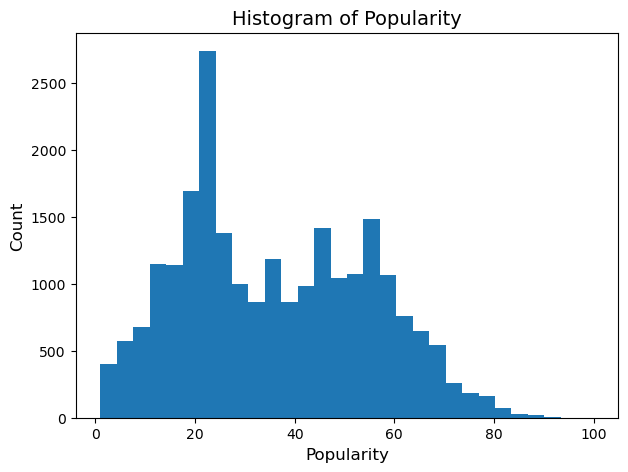

In [29]:
plt.figure(figsize=(7,5))

plt.hist(data_train.popularity, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Count", fontsize=12)
plt.xlabel("Popularity", fontsize=12)

plt.title("Histogram of Popularity", fontsize=14)

plt.show()


In [30]:
features = data.columns[7:]
target = data.columns[3:4]

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

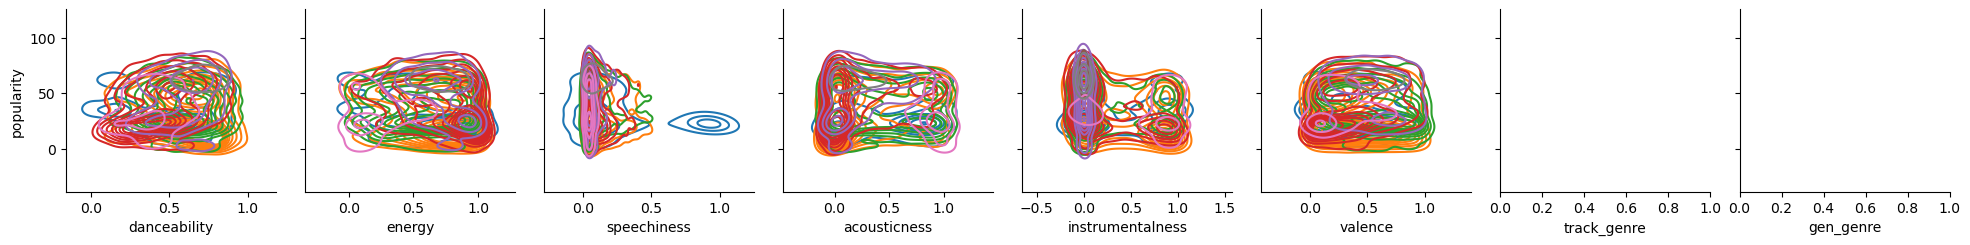

In [31]:
# Plot the pairplot
pairplot = sns.pairplot(data_train, x_vars=features, y_vars=target, kind='kde', hue = 'track_genre')  # Using 'kde' for kernel density estimation plots

# Show the plot
plt.show()

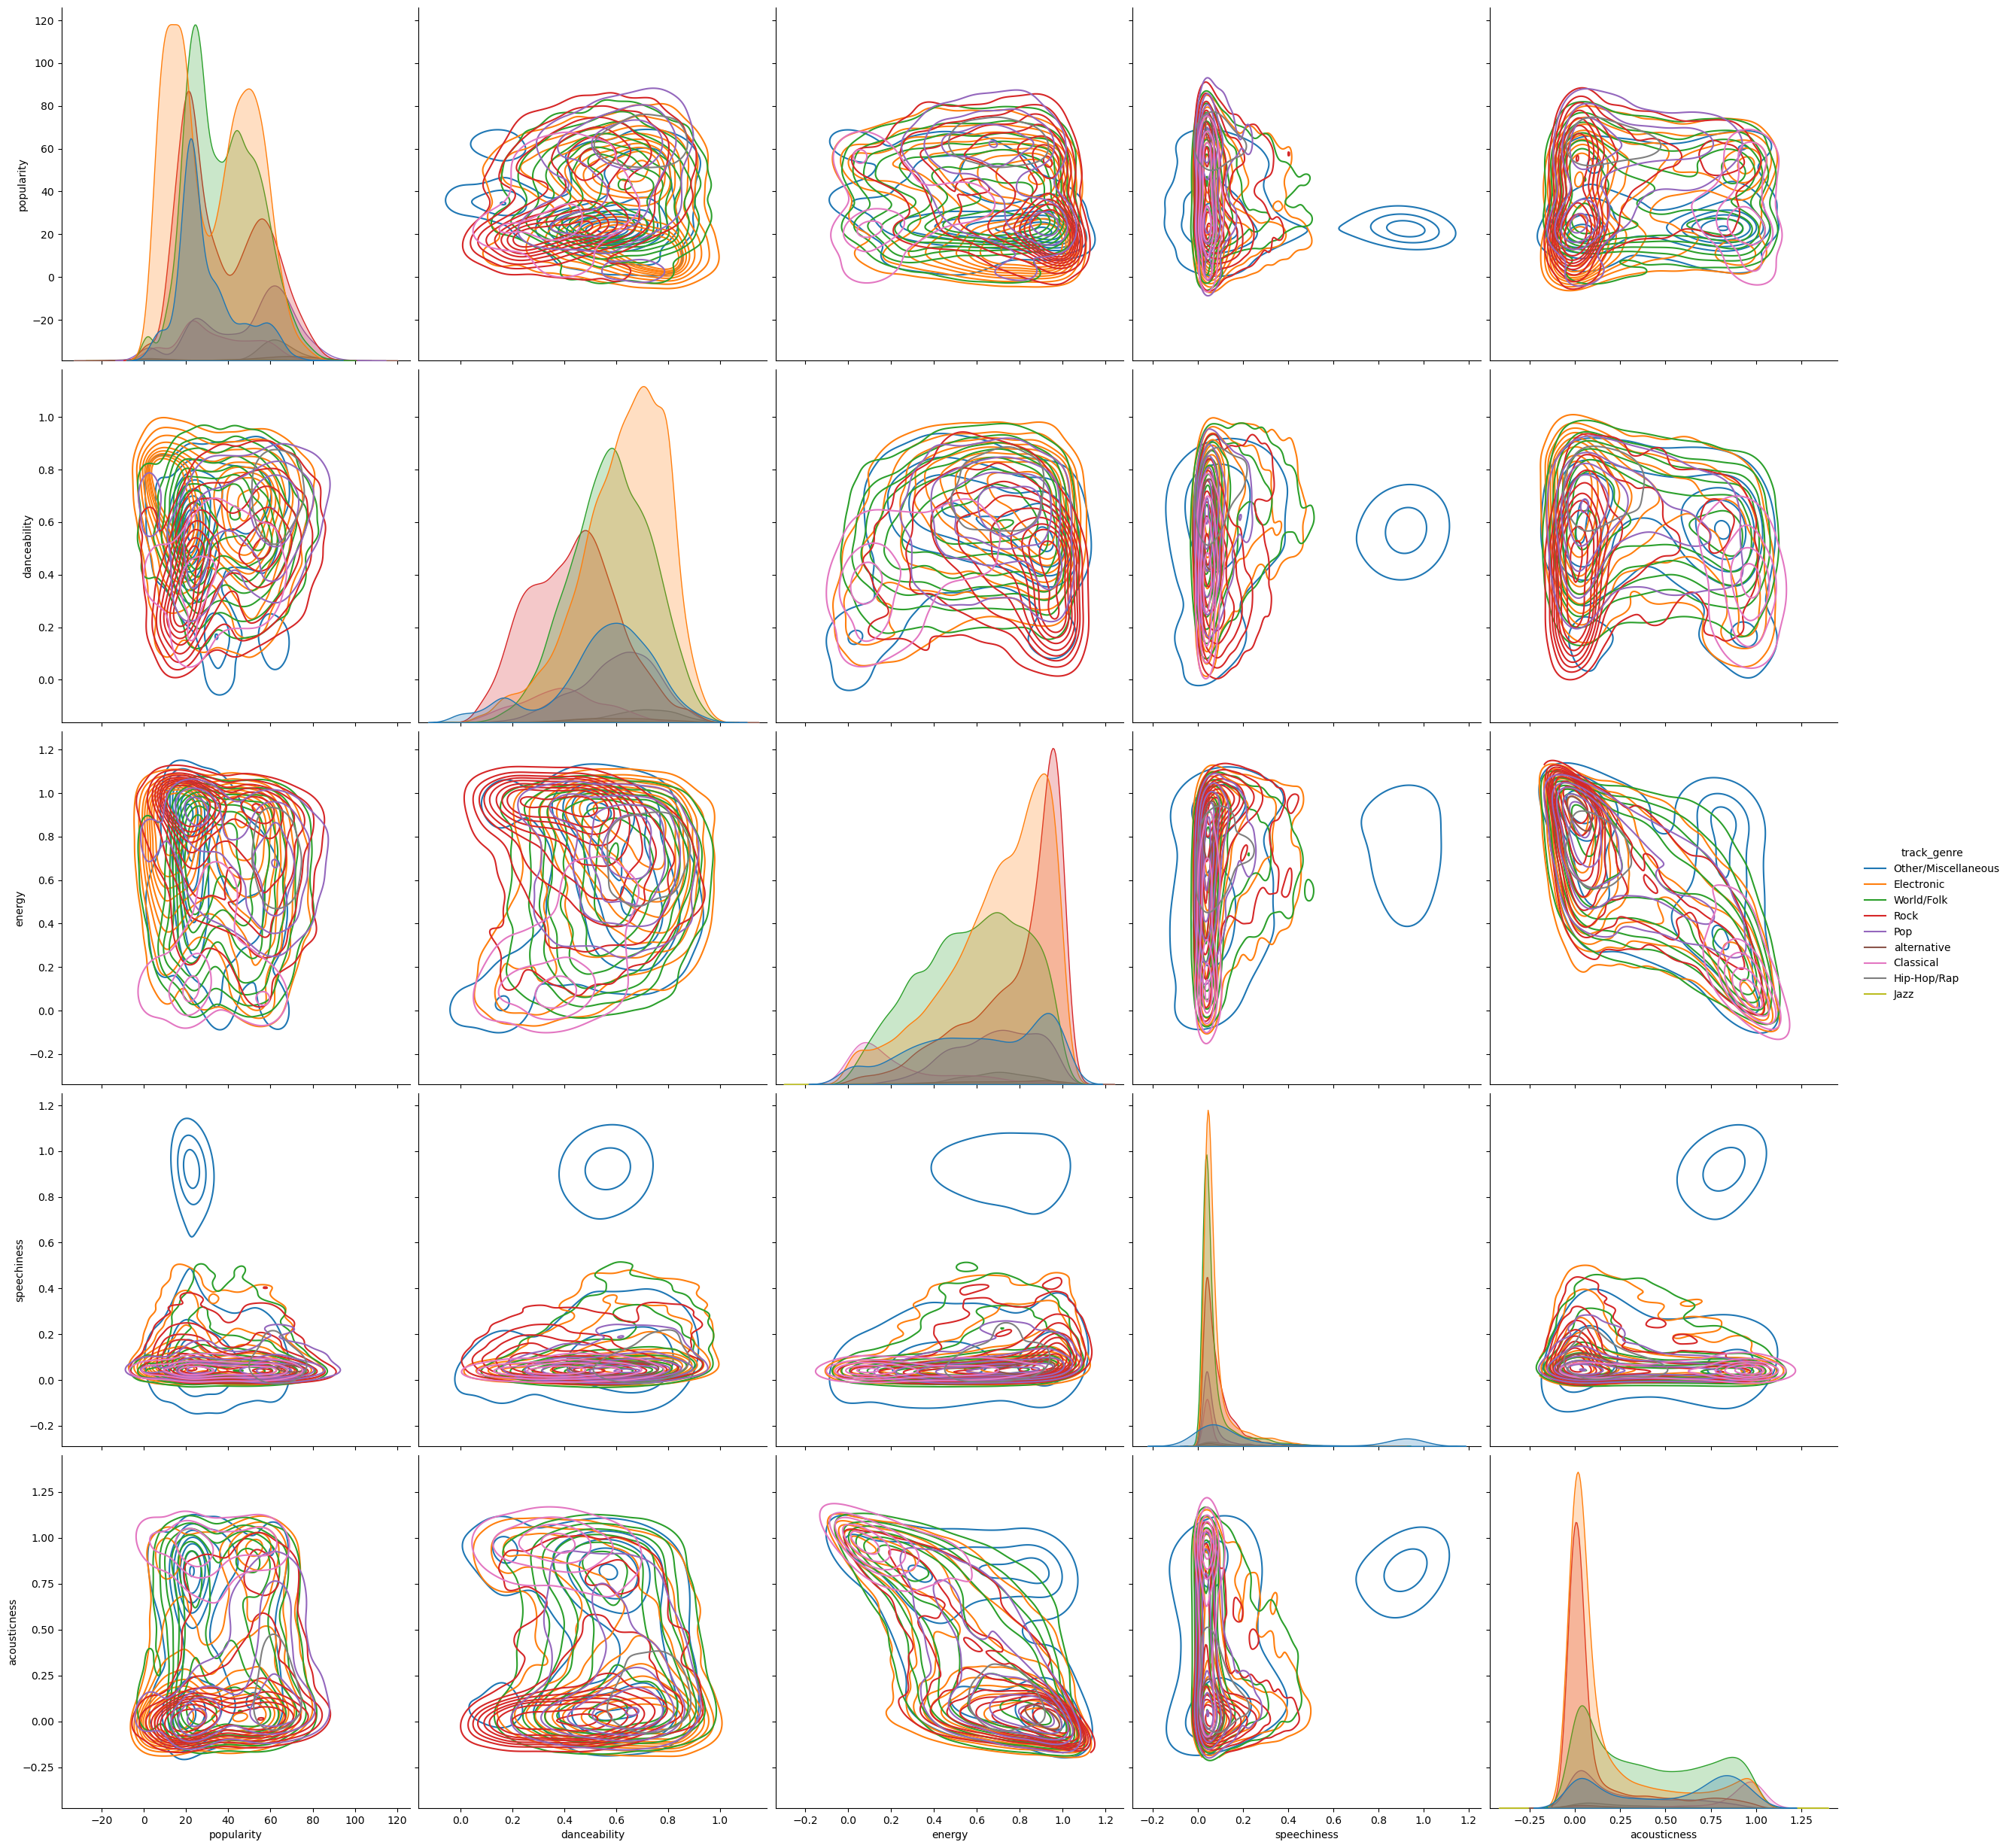

In [ ]:
from tarfile import data_filter


sns.pairplot(data_train,
                y_vars = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness'],
                x_vars = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness'],
                hue = 'track_genre',
                kind = 'kde',
                height = 5)

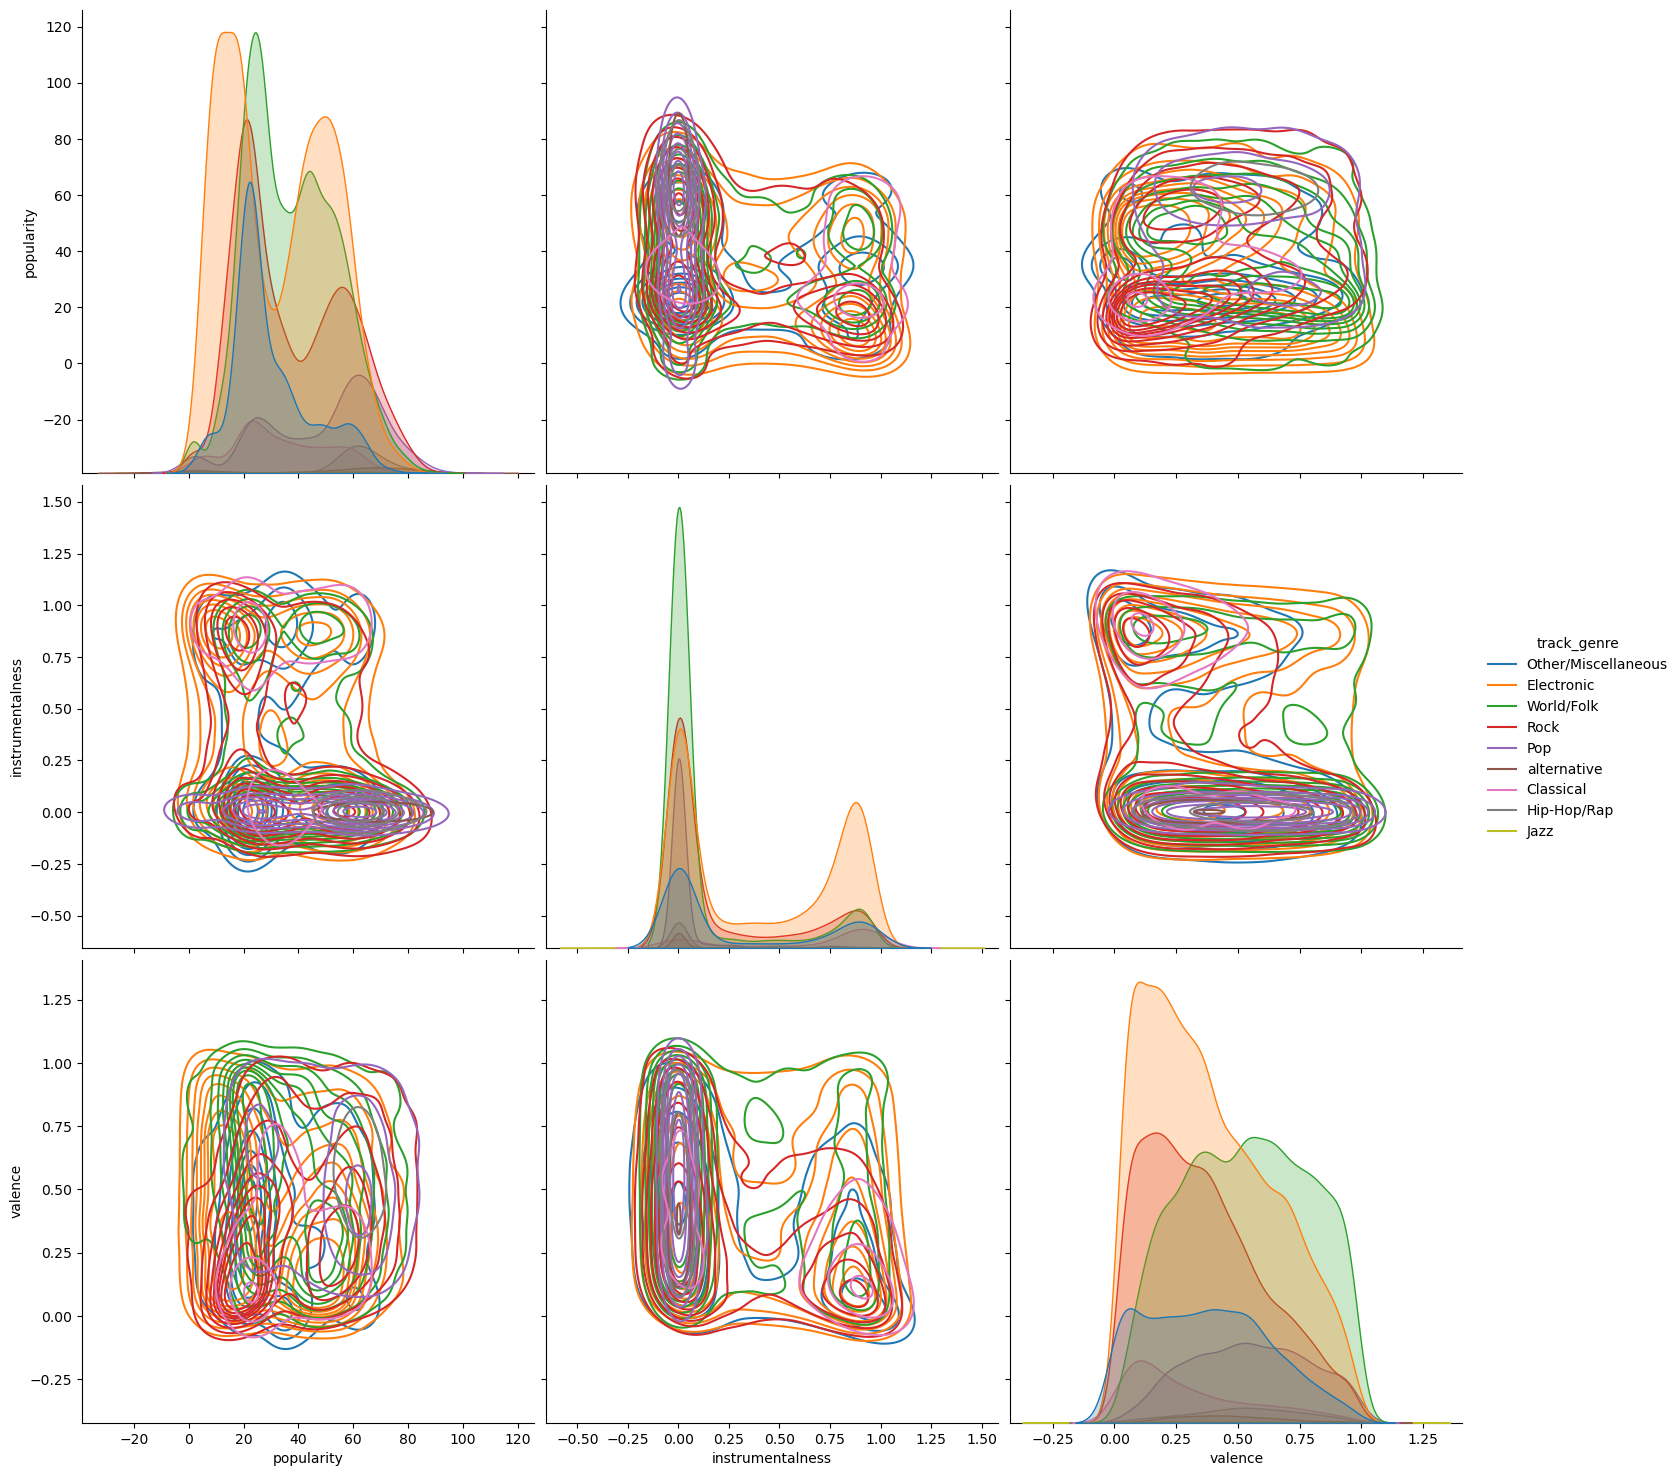

In [ ]:
sns.pairplot(data_train,
                y_vars = ['popularity', 'instrumentalness', 'valence'],
                x_vars = ['popularity', 'instrumentalness', 'valence'],
                hue = 'track_genre',
                kind = 'kde',
                height = 5)

/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axe

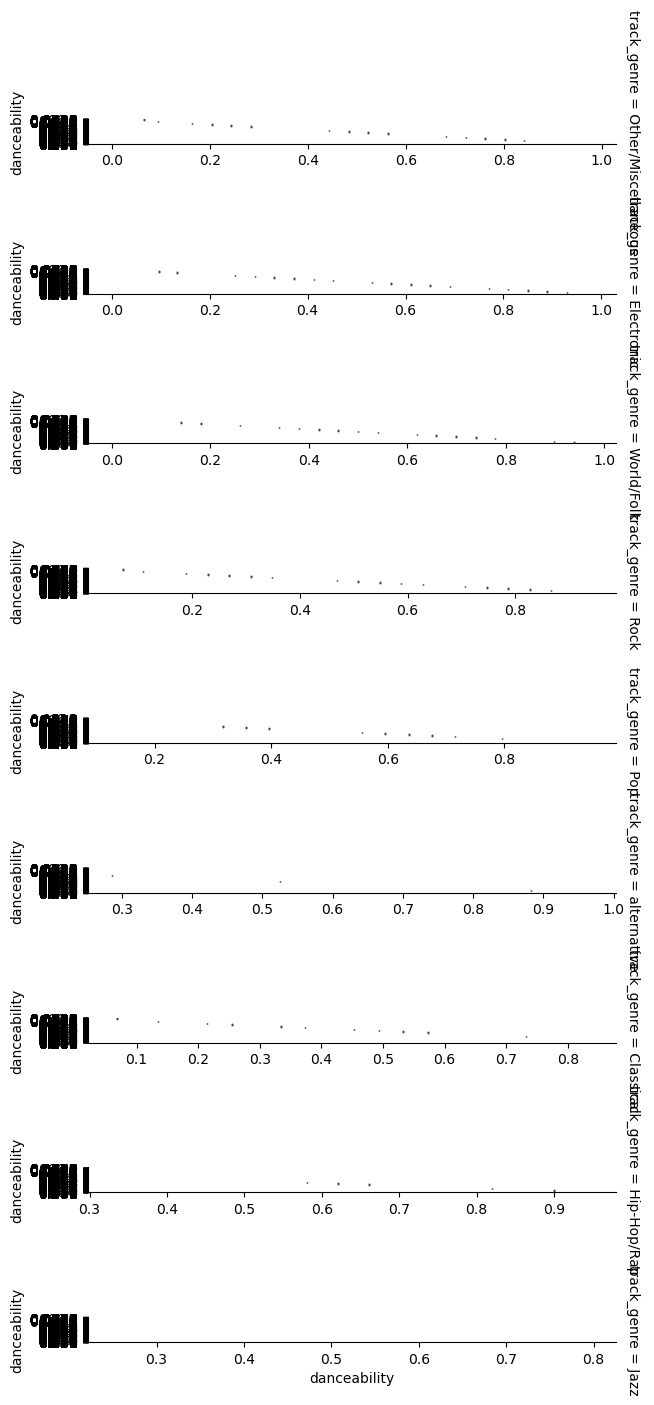

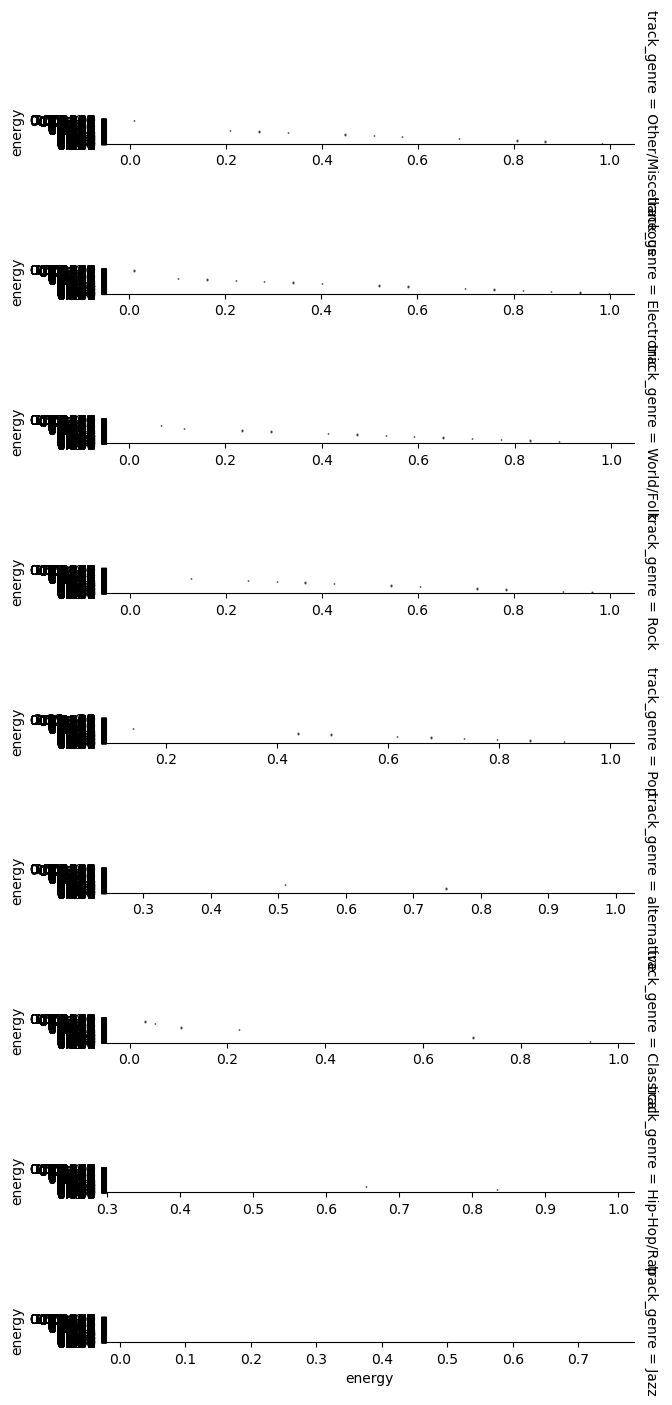

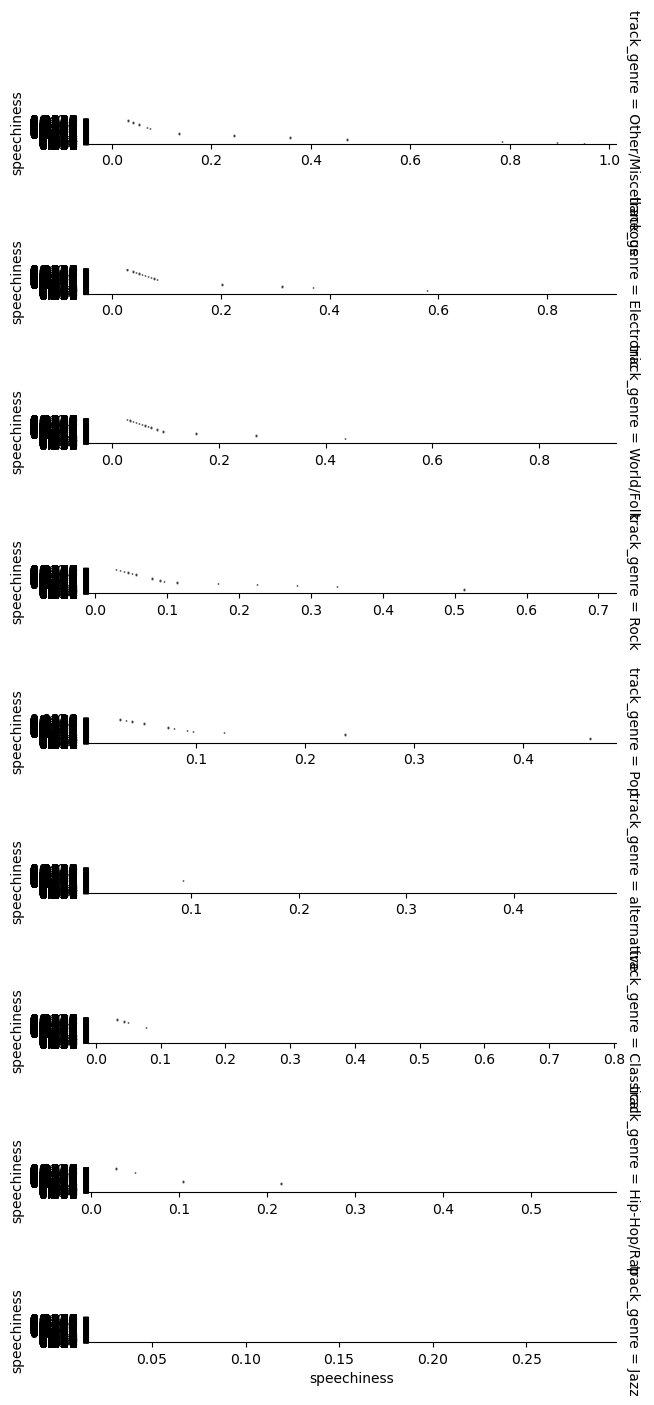

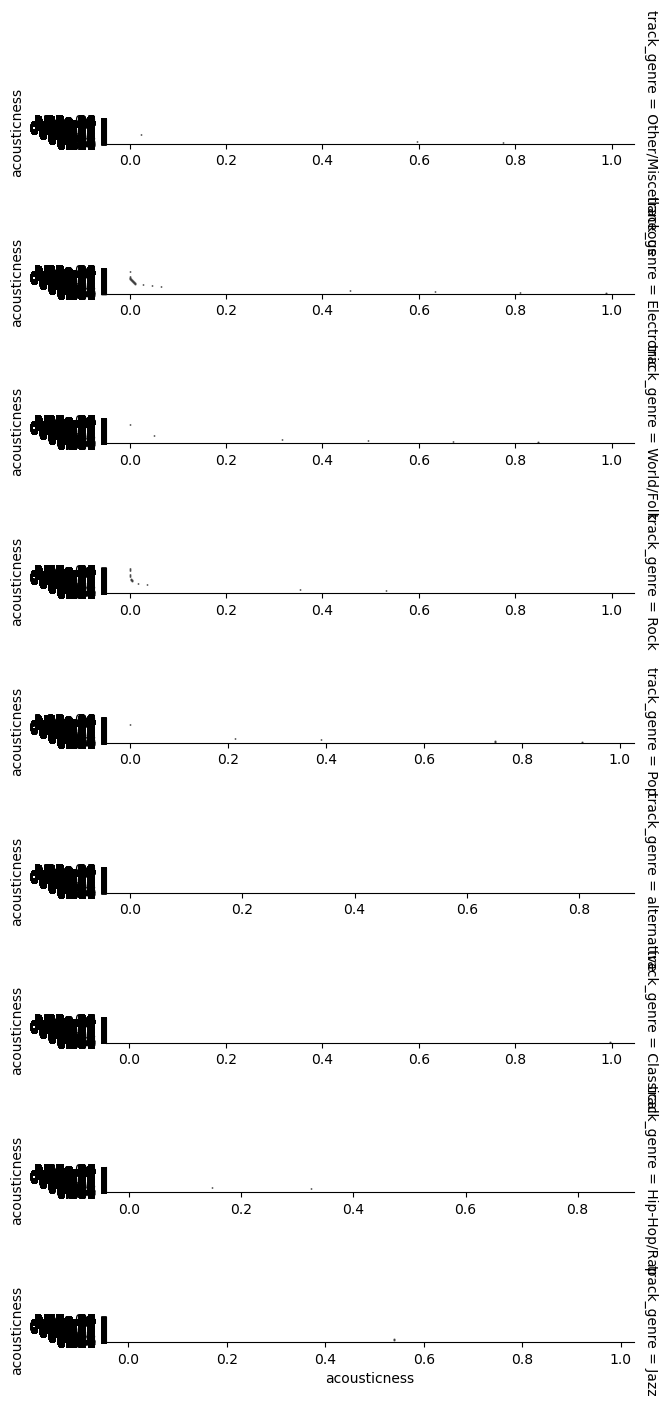

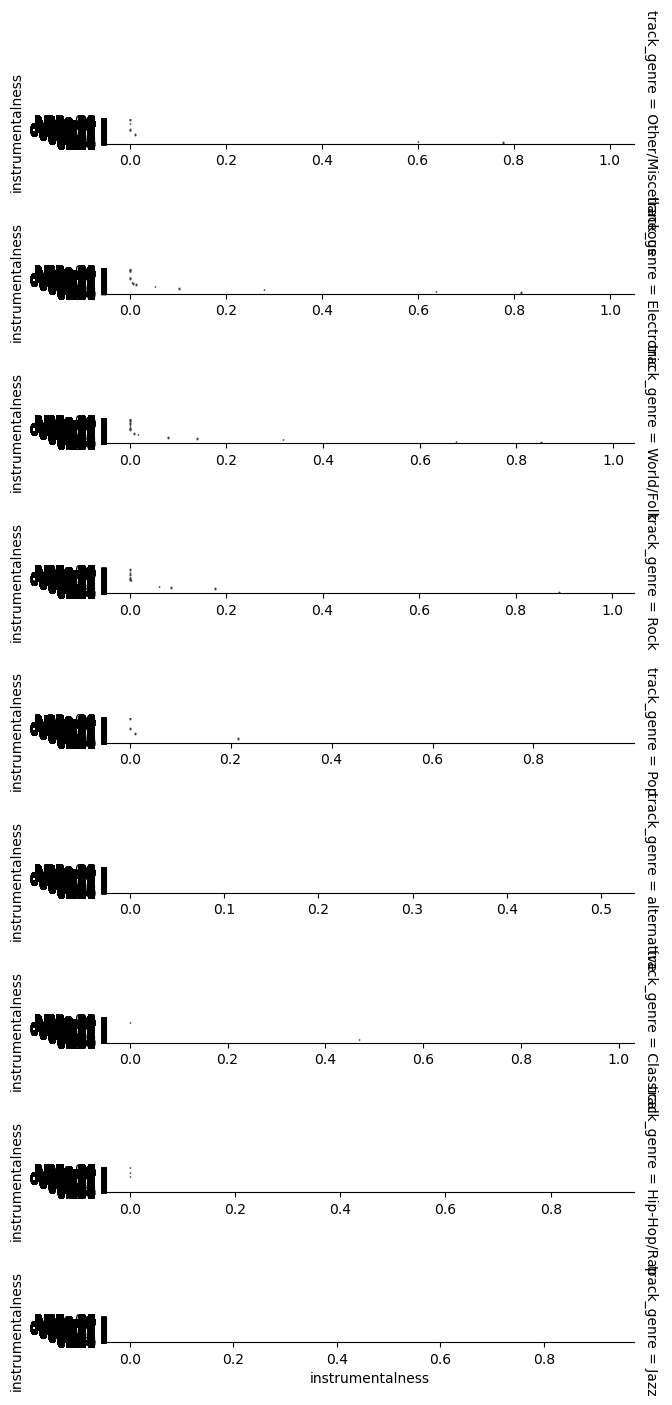

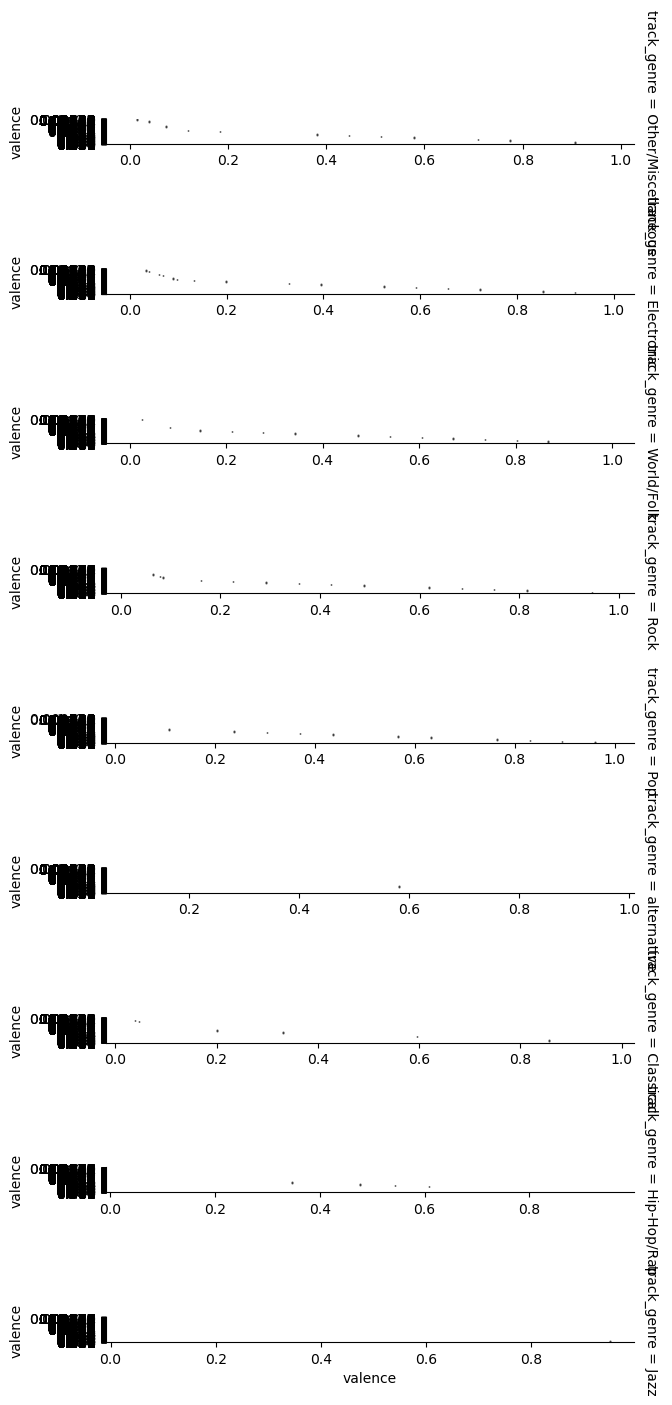

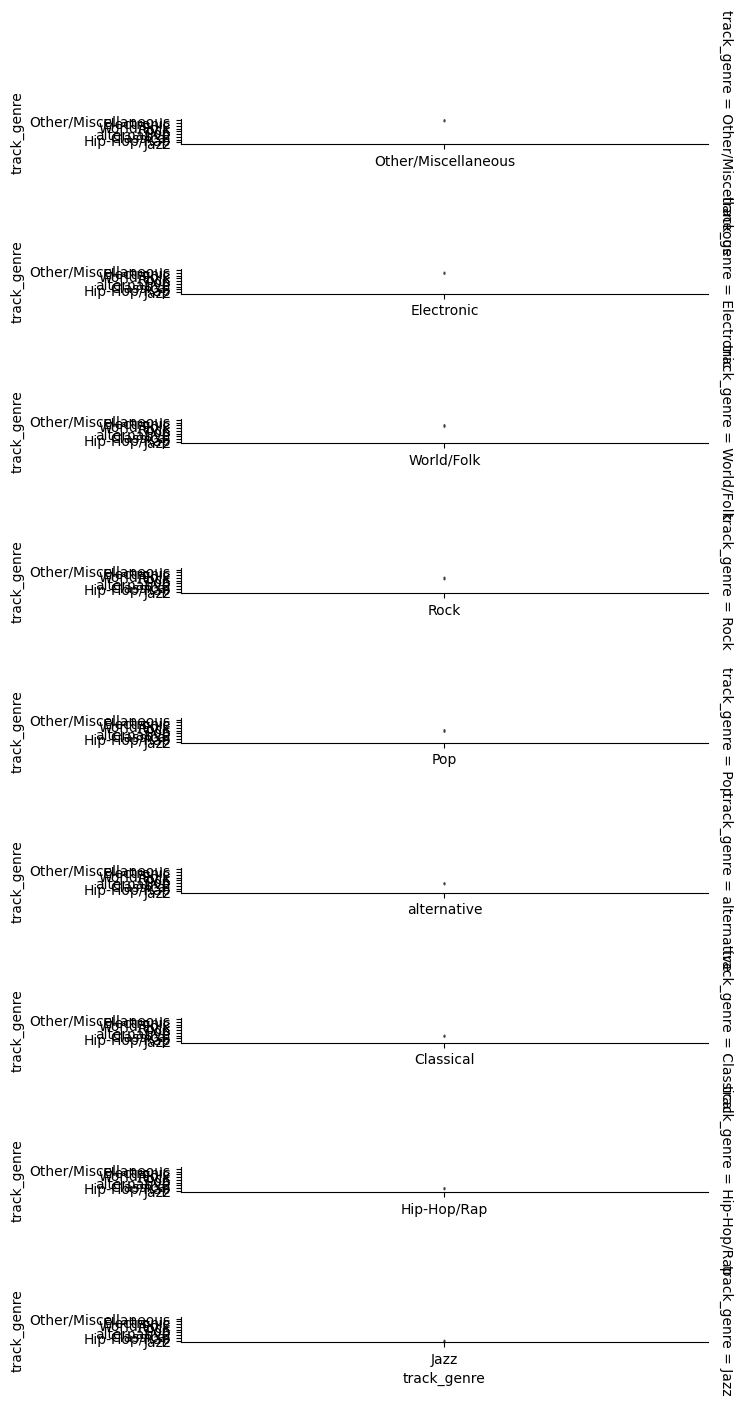

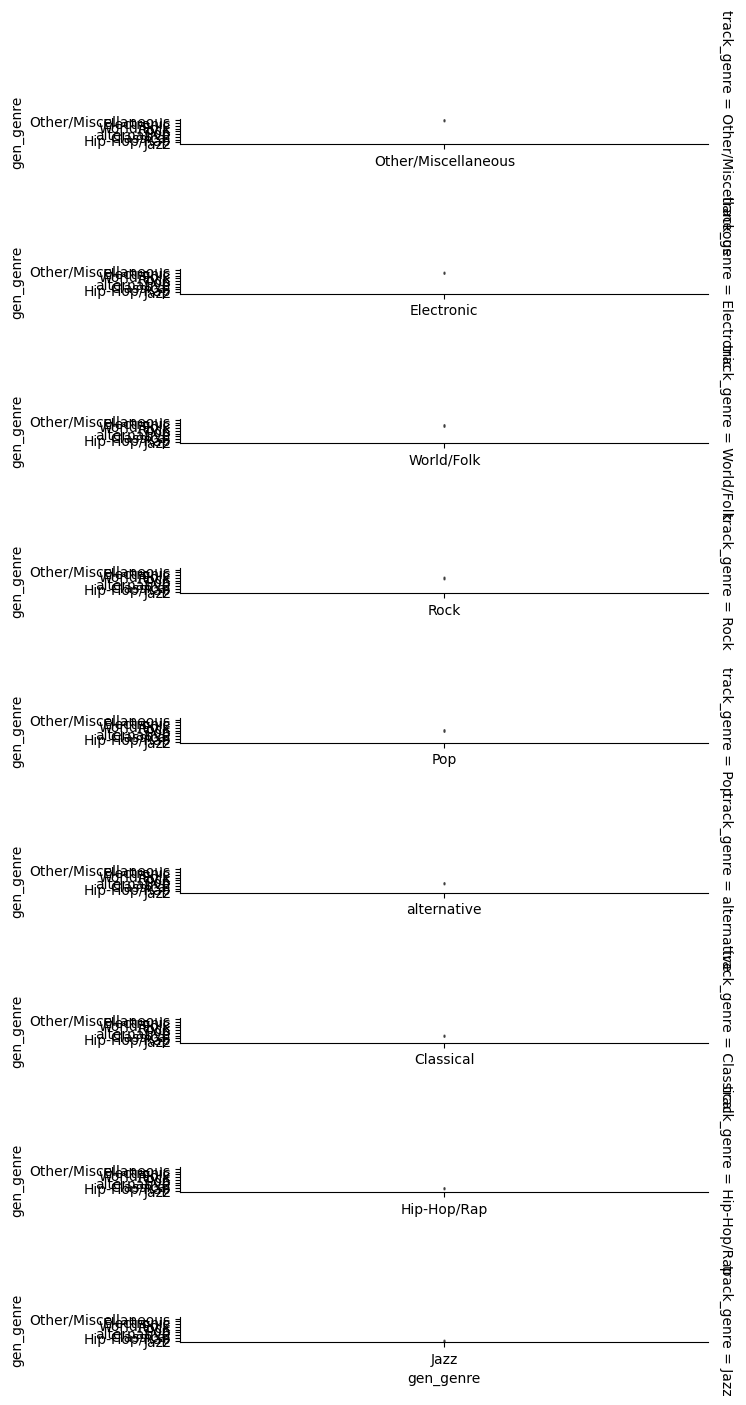

In [32]:
for i in features:
        g = sns.catplot(
        data=data_train,
        x=i, y=i, row="track_genre",
        kind="box", orient="h",
        sharex=False, margin_titles=True,
        height=1.5, aspect=4)




/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/petergraziano/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warn

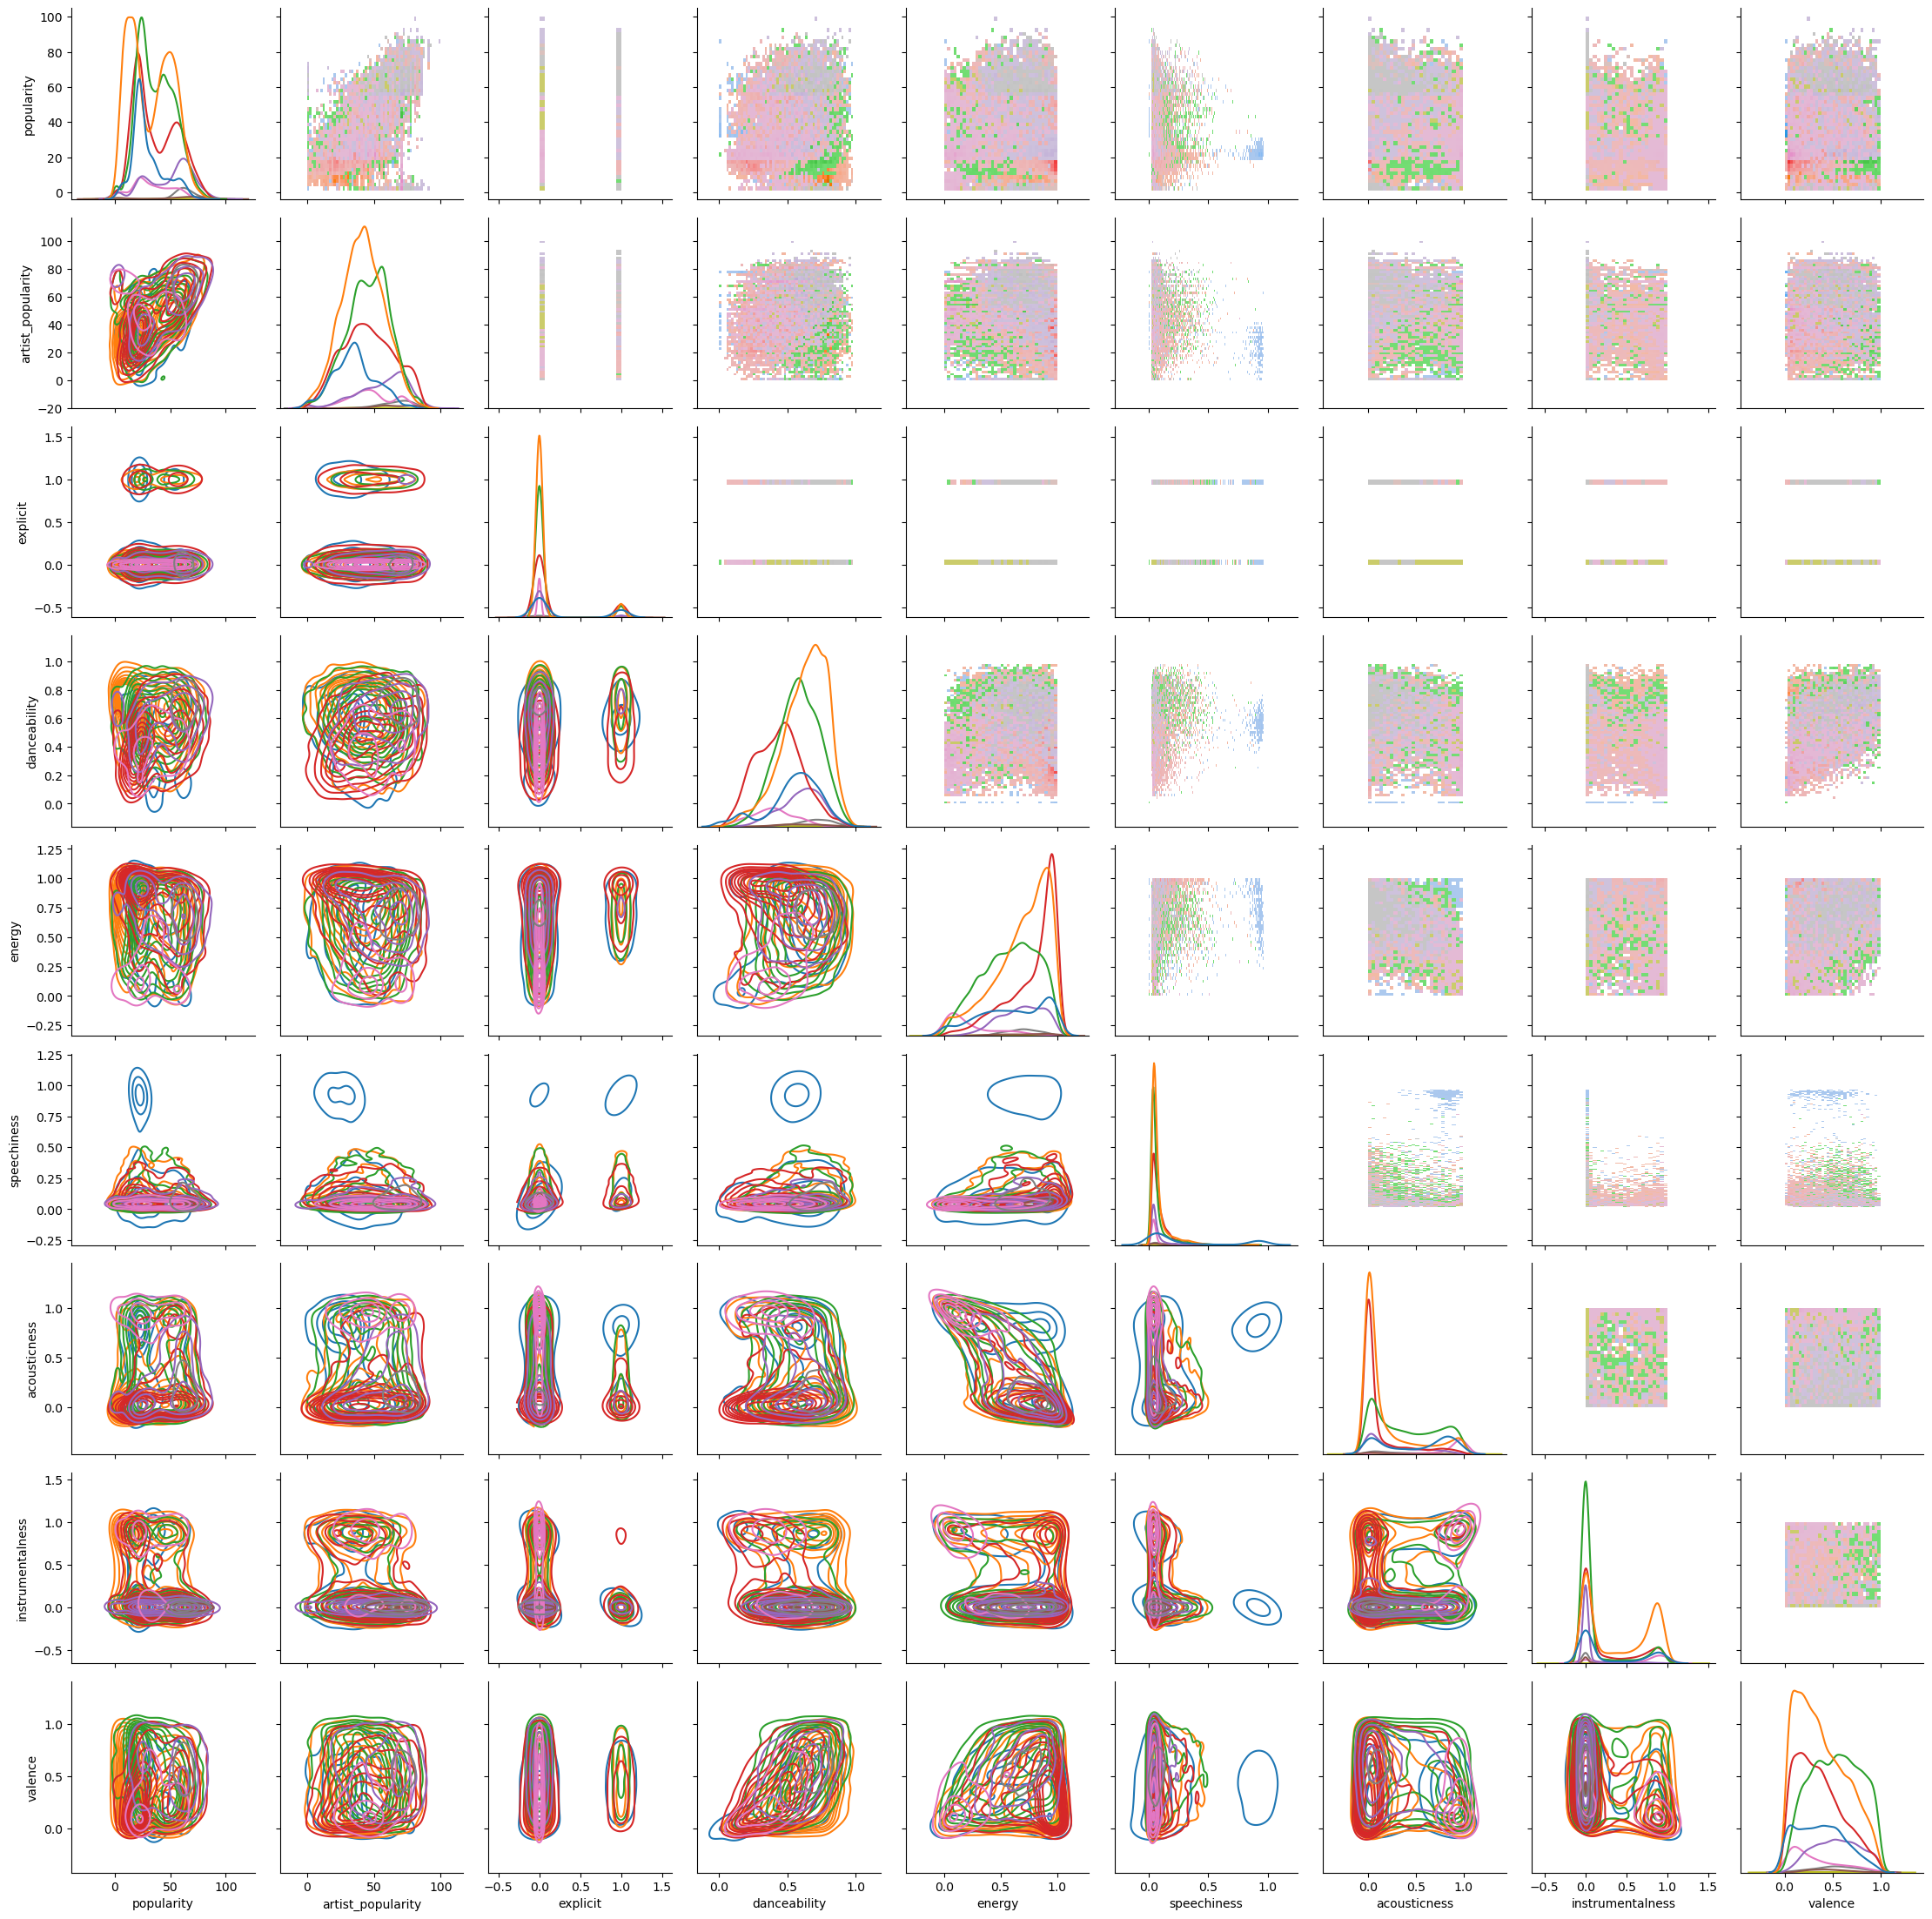

In [ ]:
g = sns.PairGrid(data_train, diag_sharey=False, hue = 'track_genre')
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

Other things to try: Break down the pair plot to just care about fewer details.  
Run it by Genre
Try to rule out the more technical musical aspects.
Try to map the genres against each other
Match by 